# Uppgift 1: user input
 ## OBS! kommentarer som redan beskrivit en funktion tas bort i nästa block


Sample with (width, height): (25, 35) classified as Pikachu
Sample with (width, height): (15, 14) classified as Pichu
Sample with (width, height): (26, 30) classified as Pichu
Sample with (width, height): (22, 45) classified as Pikachu
Sample with (width, height): (30, 25) classified as Pichu


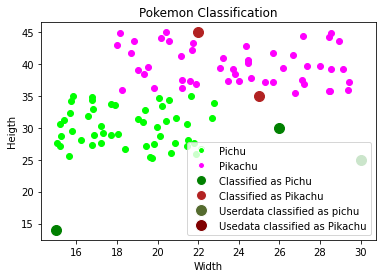

In [1]:
from matplotlib import colors
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import math

def remove_clutter(data:str, x_list:list, y_list:list) -> None: # Removes clutter from our txt files, we only want the numbers
        temp_coor = []
        temp = ""  

        for line in data: 
            temp = line
            temp = temp.replace("(","")
            temp = temp.replace(")","") # Removes every "clutter" char with nothing
            temp = temp.replace(",","")
            temp_coor = temp.split() # Split the de-cluttered string into 2 string, one x, one y
            x_list.append(float(temp_coor[0])) # turn the string into a float var and add it into the corresponding list of x/y variables
            y_list.append(float(temp_coor[1]))


def classify_closest_point(data_points:int, x_points:list, y_points:list ,is_userdata:bool = False, pichu_color:str = "green", pika_color:str = "firebrick"): #Goes through all data points given and sorts the data based on if the distance between
                                                                                                                                                              # the point and the pichu data or the pikachu data is closer
        '''Classifies data by looking for the closest point compared to our given data'''     
        for j in range(data_points): # Goes the number of data points given
            distances_pichu = [] # resets the list of distances when a new data point is given
            distances_pikachu = []
            for i in range(len(pichu_x)): 
                distances_pichu.append(math.sqrt((pichu_x[i] - x_points[j])**2 + (pichu_y[i] - y_points[j])**2))  # adds the distance between the given point and every pichu point to a list
            for i in range(len(pikachu_x)):
                distances_pikachu.append(math.sqrt((pikachu_x[i] - x_points[j])**2 + (pikachu_y[i] - y_points[j])**2)) # the distance between the same point and every pikachu point is added to a list

            distances_pichu.sort() #sorting the distances to give us the shortest distance first in the list
            distances_pikachu.sort()

            if distances_pichu[0] < distances_pikachu[0]: # if distance between this point is shorter to a pichu point, it is classified as pichu and plotted as such
                print(f"Sample with (width, height): ({x_points[j]:.0f}, {y_points[j]:.0f}) classified as Pichu")
                plt.scatter(x_points[j],y_points[j], c=pichu_color, s=100, label="Classified as pichu")
            else:                                       # if distance between this point is shorter to a pikachu point, it is classified as pikachu and plotted as such
                print(f"Sample with (width, height): ({x_points[j]:.0f}, {y_points[j]:.0f}) classified as Pikachu")
                plt.scatter(x_points[j],y_points[j], c=pika_color, s=100, label="Classified as Pikachu")

def get_userdata(): # Let's the user input data and approprietly handles errors or incorrect inputs
        user_data = []
        while True:
            answ = input("Do you want to input a datapoint? (y/n): ")# Checks if the input is a y or n
            try:
                answ = str(answ)
                if answ.upper() == "Y": # if it is a y or n, lets the user input a coordinate in the form given (x y)
                    user_data = input("Please input coordinates: (x y): ").split()
                    try:
                        if len(user_data) == 2: # if the input is 2 variables long, adds them to their corresponding variable
                            try:
                                user_x.append(float(user_data[0]))
                                user_y.append(float(user_data[1]))
                                break
                            except TypeError: # displays error message if the user inputs fewer than or more than 2 numbers
                                print("Please input a 2d coordinate (consisting of numbers)")
                        else:
                            print("Please input a 2d coordinate")
                    except ValueError as err:
                        print(err)
                elif answ.upper() == "N": # if the input is a n or N, userinput is cancelled
                    print("User input ended")
                    break
            except TypeError as err:
                print(err)

with open("files/pichu.txt", "r") as f_pichu, open("files/pikachu.txt", "r") as f_pikachu, open("files/test_points.txt", "r") as f_testpoints:

    pichu_data = f_pichu.readlines()
    pikachu_data = f_pikachu.readlines() # read every data file
    test_points = f_testpoints.readlines()
    pichu_data.pop(0) # remove the "(width (cm), height (cm))"" line in pichu and pikachu data
    pikachu_data.pop(0)

    pikachu_x = []
    pikachu_y = []
    pichu_x = [] # lists to store every x and y point for our data files and user input
    pichu_y = []
    test_points_x = []
    test_points_y = []
    user_x = []
    user_y = []
    
    remove_clutter(pichu_data, pichu_x, pichu_y)
    remove_clutter(pikachu_data, pikachu_x, pikachu_y) # removes clutter from all our datafiles and stores them in appropriate lists
    remove_clutter(test_points, test_points_x, test_points_y)
    
    plt.scatter(pichu_x, pichu_y, c="lime", label = "Pichu") # plot all original pichu and pikachu data
    plt.scatter(pikachu_x, pikachu_y, c="magenta", label = "Pikachu")

    get_userdata()
    classify_closest_point(len(test_points_x), test_points_x, test_points_y)
    classify_closest_point(len(user_x),user_x, user_y, True)

    # Since i dont wanna add a legend entry everytime we iterate over our classify_five_points() function, i use matplotlib's Line2D to create the legend manually, taken from here (source): "https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html"
    legend_elements = [Line2D([0], [0], color="w",markerfacecolor="lime", marker="o", label="Pichu"),
    Line2D([0], [0], color="w",markerfacecolor="magenta", marker="o", label="Pikachu"),
    Line2D([0], [0], color="w",markerfacecolor="green", marker="o",markersize=10, label="Classified as Pichu"),
    Line2D([0], [0], color="w",markerfacecolor="firebrick", marker="o",markersize=10, label="Classified as Pikachu"),
    Line2D([0], [0], color="w",markerfacecolor="darkolivegreen", marker="o",markersize=12, label="Userdata classified as pichu"),
    Line2D([0], [0], color="w",markerfacecolor="maroon", marker="o",markersize=12, label="Usedata classified as Pikachu")]

    plt.legend(handles=legend_elements, loc="best", prop={'size': 10})
    
    plt.title('Pokemon Classification')
    plt.xlabel("Width")
    plt.ylabel("Heigth")
    plt.show()


# Uppgift 2: fem närmaste punkterna

Sample with (width, height): (25, 35) classified as Pikachu
Sample with (width, height): (15, 14) classified as Pichu
Sample with (width, height): (26, 30) classified as Pichu
Sample with (width, height): (22, 45) classified as Pikachu
User sample with (width, height): (30, 30) classified as Pikachu


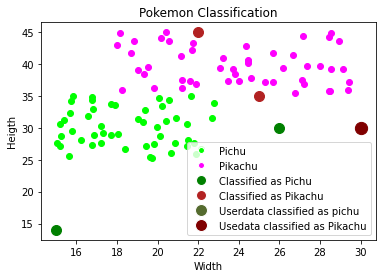

In [2]:
from matplotlib import colors
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import math

def remove_clutter(data:str, x_list:list, y_list:list) -> None:
        temp_coor = []
        temp = ""  

        for line in data: 
            temp = line
            temp = temp.replace("(","")
            temp = temp.replace(")","")
            temp = temp.replace(",","")
            temp_coor = temp.split() 
            x_list.append(float(temp_coor[0])) 
            y_list.append(float(temp_coor[1]))

def classify_five_points(data_points:int, x_points:list, y_points:list, is_userdata:bool = False, pichu_color:str = "green", pika_color:str = "firebrick"): 
        '''Classifies data by looking for the 5 closest points compared to our given data'''

        for j in range(data_points): # goes through every data point given
            distances_pichu = []  # resets the list of distances when a new data point is given
            distances_pikachu = []
            for i in range(len(pichu_x)):
                distances_pichu.append(math.sqrt((pichu_x[i] - x_points[j])**2 + (pichu_y[i] - y_points[j])**2)) # adds the distance between the given point and every pichu point to a list
            for i in range(len(pikachu_x)):
                distances_pikachu.append(math.sqrt((pikachu_x[i] - x_points[j])**2 + (pikachu_y[i] - y_points[j])**2)) # the distance between the same point and every pikachu point is added to a list

            avrg_pichu = 0
            avrg_pikachu = 0
            distances_pichu.sort() # sorts the pichu and pikachu data to have the smallest distances in the start of the list
            distances_pikachu.sort()

            avrg_pichu = sum(distances_pichu[0:5]) / len(distances_pichu[0:5]) # calculates the avarage of the 5 smallest distances between our data point and our pichu points
            avrg_pikachu = sum(distances_pikachu[0:5]) / len(distances_pikachu[0:5]) # the same but for the pikachu data

            if avrg_pichu < avrg_pikachu: # if the avarage of the 5 points is smaller for pichu, the data is classified as pichu and is then plotted
                
                if is_userdata == False: # the is_userdata lets us see in the output which of the coordinates that is user input
                    print(f"Sample with (width, height): ({x_points[j]:.0f}, {y_points[j]:.0f}) classified as Pichu")
                    plt.scatter(x_points[j],y_points[j], c="green", s=100, label="Classified as Pichu")
                if is_userdata == True:
                    print(f"User sample with (width, height): ({x_points[j]:.0f}, {y_points[j]:.0f}) classified as Pichu")
                    plt.scatter(x_points[j],y_points[j], c="darkolivegreen", s=150, label="Userdata classified as pichu")
            else:                       # if the avarage between the 5 points instead is smaller for pikachu, the data is classified as pikachu and is then plotted
                
                if is_userdata == False:
                    print(f"Sample with (width, height): ({x_points[j]:.0f}, {y_points[j]:.0f}) classified as Pikachu")
                    plt.scatter(x_points[j],y_points[j], c="firebrick", s=100, label="Classified as Pikachu")
                if is_userdata == True:
                    print(f"User sample with (width, height): ({x_points[j]:.0f}, {y_points[j]:.0f}) classified as Pikachu")
                    plt.scatter(x_points[j],y_points[j], c="maroon", s=150, label= "Userdata classified as Pikachu")


def get_userdata():
        user_data = []
        while True:
            answ = input("Do you want to input a datapoint? (y/n): ") 
            try:
                answ = str(answ)
                if answ.upper() == "Y": 
                    user_data = input("Please input coordinates: (x y): ").split()
                    try:
                        if len(user_data) == 2:
                            try:
                                user_x.append(float(user_data[0]))
                                user_y.append(float(user_data[1]))
                                break
                            except TypeError: 
                                print("Please input a 2d coordinate (consisting of numbers)")
                        else:
                            print("Please input a 2d coordinate")
                    except ValueError as err:
                        print(err)
                elif answ.upper() == "N": 
                    print("No user input")
                    break
            except TypeError as err:
                print(err)

with open("files/pichu.txt", "r") as f_pichu, open("files/pikachu.txt", "r") as f_pikachu, open("files/test_points.txt", "r") as f_testpoints:

    pichu_data = f_pichu.readlines()
    pikachu_data = f_pikachu.readlines() 
    test_points = f_testpoints.readlines()
    pichu_data.pop(0) 
    pikachu_data.pop(0)

    pikachu_x = []
    pikachu_y = []
    pichu_x = []
    pichu_y = []
    test_points_x = []
    test_points_y = []
    user_x = []
    user_y = []
    
    remove_clutter(pichu_data, pichu_x, pichu_y)
    remove_clutter(pikachu_data, pikachu_x, pikachu_y) 
    remove_clutter(test_points, test_points_x, test_points_y)
    
    plt.scatter(pichu_x, pichu_y, c="lime", label = "Pichu") 
    plt.scatter(pikachu_x, pikachu_y, c="magenta", label = "Pikachu")

    get_userdata()
    classify_five_points(len(test_points_x), test_points_x, test_points_y)
    classify_five_points(len(user_x),user_x, user_y, True)

    '''Since i dont wanna add a legend entry everytime we iterate over our classify_five_points() function, i use matplotlib's Line2D to create the legend manually, taken from here (source): "https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html"'''
    legend_elements = [Line2D([0], [0], color="w",markerfacecolor="lime", marker="o", label="Pichu"),
    Line2D([0], [0], color="w",markerfacecolor="magenta", marker="o", label="Pikachu"),
    Line2D([0], [0], color="w",markerfacecolor="green", marker="o",markersize=10, label="Classified as Pichu"),
    Line2D([0], [0], color="w",markerfacecolor="firebrick", marker="o",markersize=10, label="Classified as Pikachu"),
    Line2D([0], [0], color="w",markerfacecolor="darkolivegreen", marker="o",markersize=12, label="Userdata classified as pichu"),
    Line2D([0], [0], color="w",markerfacecolor="maroon", marker="o",markersize=12, label="Usedata classified as Pikachu")]

    plt.legend(handles=legend_elements, loc="best", prop={'size': 10})
    plt.title('Pokemon Classification')
    plt.xlabel("Width")
    plt.ylabel("Heigth")
    plt.show()


# Bonusuppgift 3 + 4 accuracy

In [3]:
from matplotlib import colors
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import math
import random

def remove_clutter(data:str, x_list:list, y_list:list) -> None:
        temp_coor = []
        temp = ""  

        for line in data: 
            temp = line
            temp = temp.replace("(","")
            temp = temp.replace(")","") 
            temp = temp.replace(",","")
            temp_coor = temp.split() 
            x_list.append(float(temp_coor[0])) 
            y_list.append(float(temp_coor[1]))

def classify_five_points(data_points:int, x_points:list, y_points:list, is_pikachu:bool, is_testdata:bool = False, pichu_color:str = "green", pika_color:str = "firebrick"): 
        '''Classifies data by looking for the 5 closest points compared to our given data'''
        global True_positive, True_negative, False_positive, False_negative
        for j in range(data_points): 
            distances_pichu = []
            distances_pikachu = []
            for i in range(len(pichu_x)):
                distances_pichu.append(math.sqrt((pichu_x[i] - x_points[j])**2 + (pichu_y[i] - y_points[j])**2))
            for i in range(len(pikachu_x)):
                distances_pikachu.append(math.sqrt((pikachu_x[i] - x_points[j])**2 + (pikachu_y[i] - y_points[j])**2)) 

            avrg_pichu = 0
            avrg_pikachu = 0
            distances_pichu.sort()
            distances_pikachu.sort()

            avrg_pichu = sum(distances_pichu[0:5]) / len(distances_pichu[0:5]) 
            avrg_pikachu = sum(distances_pikachu[0:5]) / len(distances_pikachu[0:5])

            if avrg_pichu < avrg_pikachu:
                if is_testdata == True:
                    if is_pikachu == True:
                        False_negative += 1
                    else:
                        True_negative += 1
            else:
                if is_testdata == True:
                    if is_pikachu == True:
                        True_positive += 1
                    else:
                        False_positive += 1
            


def classify_closest_point(data_points:int, x_points:list, y_points:list , is_pikachu:bool, is_testdata:bool = False,  pichu_color:str = "green", pika_color:str = "firebrick"):
        '''Classifies data by looking for the closest point compared to our given data'''  
        global True_positive, True_negative, False_positive, False_negative   
        for j in range(data_points):
            distances_pichu = []
            distances_pikachu = []
            for i in range(len(pichu_x)):
                distances_pichu.append(math.sqrt((pichu_x[i] - x_points[j])**2 + (pichu_y[i] - y_points[j])**2))
            for i in range(len(pikachu_x)):
                distances_pikachu.append(math.sqrt((pikachu_x[i] - x_points[j])**2 + (pikachu_y[i] - y_points[j])**2))

            distances_pichu.sort()
            distances_pikachu.sort()

            if distances_pichu[0] < distances_pikachu[0]:
                if is_testdata == True:
                    if is_pikachu == True:
                        False_negative += 1
                    else:
                        True_negative += 1
            else:
                if is_testdata == True:
                    if is_pikachu == True:
                        True_positive += 1
                    else:
                        False_positive += 1

with open("files/pichu.txt", "r") as f_pichu, open("files/pikachu.txt", "r") as f_pikachu, open("files/test_points.txt", "r") as f_testpoints:

    pichu_data = f_pichu.readlines() # read data files
    pikachu_data = f_pikachu.readlines() 
    pichu_data.pop(0) # remove the "(width (cm), height (cm))"" line in pichu and pikachu data
    pikachu_data.pop(0)
    for j in range(2): # runs twice, once for every classification method

        True_positive = 0
        True_negative = 0
        False_positive = 0 # resets the variables when changing classification method
        False_negative = 0

        for i in range(5000): # This number can theoretically be anything larger than one, i took 5000 for no particular reason
        
            random.shuffle(pichu_data) # randomise the order of the data points in pichu and pikachu
            random.shuffle(pikachu_data)

            pikachu_x = []
            pikachu_y = []
            pichu_x = [] # lists to store every x and y point for our data files 
            pichu_y = []
            
            remove_clutter(pichu_data, pichu_x, pichu_y)
            remove_clutter(pikachu_data, pikachu_x, pikachu_y) # removes clutter from all our datavariables and stores them in appropriate lists
            
            random_pichu_x = pichu_x[0:5]
            random_pichu_y = pichu_y[0:5] # sets the corresponding random x and y list for both pokemon to the first 5 elements of the original shuffled data list
            random_pikachu_x = pikachu_x[0:5]
            random_pikachu_y = pikachu_y[0:5]
            
            pichu_x = pichu_x[5:]
            pichu_y = pichu_y[5:] # then removes the same 5 points from the "original" data list, making these our new training data lists
            pikachu_x = pikachu_x[5:]
            pikachu_y = pikachu_y[5:]

            if j == 0: # runs the classification method on n number of itherations using only the closest point
                classify_closest_point(5,random_pichu_x,random_pichu_y,False, True)
                classify_closest_point(5,random_pikachu_x,random_pikachu_y,True, True)
            else: # runs the classification method on n number of iterations using the 5 closest points there after
                classify_five_points(5,random_pichu_x, random_pichu_y, False, True)
                classify_five_points(5,random_pikachu_x, random_pikachu_y, True, True)
        print(f"Method -> {'Closest point' if j==0 else 'Five closest points'}:\nTrue positives: {True_positive}\nTrue negatives: {True_negative}\nFalse positives: {False_positive}\nFalse_negatives: {False_negative}\nAccuracy = {10*(True_positive+True_negative)/5000}%\n") 


Method -> Closest point:
True positives: 24920
True negatives: 24969
False positives: 31
False_negatives: 80
Accuracy = 99.778%

Method -> Five closest points:
True positives: 24493
True negatives: 24890
False positives: 110
False_negatives: 507
Accuracy = 98.766%

